# https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("amazon.csv",encoding='iso-8859-1',parse_dates=['date'])
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [5]:
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

# 1. Display Top 5 Rows of The Dataset

In [6]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# 2. Check Last 5 Rows

In [7]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [8]:
df.shape

(6454, 5)

In [9]:
print(f'no of rows:{df.shape[0]}')
print(f'no of cols:{df.shape[1]}')

no of rows:6454
no of cols:5


# 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


# 5. Check For Duplicate Data and Drop Them

In [11]:
df.duplicated().sum()

32

In [12]:
df=df.drop_duplicates()

In [13]:
df.shape

(6422, 5)

# 6. Check Null Values In The Dataset

In [14]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

# 7. Get Overall Statistics About The Dataframe

In [47]:
df.describe()

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


# 8. Rename Month Names To English

In [16]:
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [48]:
df['month_new']=df['month'].map({'Janeiro':'jan',
                                 'Fevereiro':'feb',
                                 'Março':'mar', 
                                'Abril':'apr',
                                 'Maio':'may',
                                 'Junho':'june',
                                'Julho':'july',
                                 'Agosto':'aug',
                                 'Setembro':'sep',
                                 'Outubro':'oct',
                                 'Novembro':'nov',
                                 'Dezembro':'dec'})

C:\Users\debip\AppData\Local\Temp\ipykernel_6356\48683697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_new']=df['month'].map({'Janeiro':'jan',


In [49]:
df.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


# 9. Total Number of Fires Registered

In [19]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [20]:
df.shape

(6422, 6)

# 10. In Which Month Maximum Number of Forest Fires Were Reported?

In [21]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [52]:
df1=df.groupby('month_new').agg({'number':'sum'}).reset_index()

In [53]:
df1

,month_new,number
0,apr,28184.770
1,aug,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,july,92319.113
6,june,55997.675
7,mar,30709.405
8,may,34725.363
9,nov,85508.054


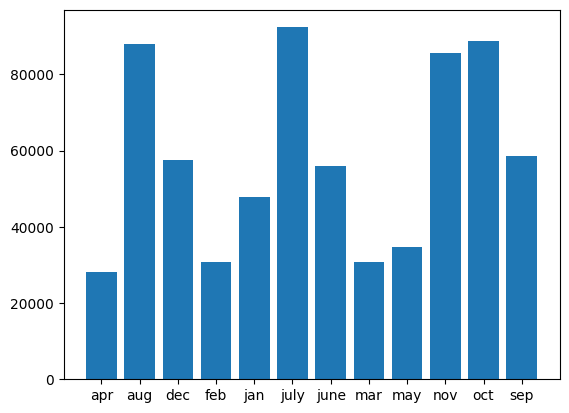

In [24]:
plt.bar(df1['month_new'],df1['number'])
plt.show()

# 11. In Which Year Maximum Number of Forest Fires Was Reported?

In [25]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [26]:
df.head(2)

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan


In [27]:
df2=df.groupby("year").agg({'number':'sum'}).reset_index()
print(df2)

    year     number
0   1998  20013.971
1   1999  26882.821
2   2000  27351.251
3   2001  29054.612
4   2002  37390.600
5   2003  42760.674
6   2004  38450.163
7   2005  35004.965
8   2006  33824.161
9   2007  33028.413
10  2008  29378.964
11  2009  39116.178
12  2010  37037.449
13  2011  34633.545
14  2012  40084.860
15  2013  35137.118
16  2014  39621.183
17  2015  41208.292
18  2016  42212.229
19  2017  36619.624


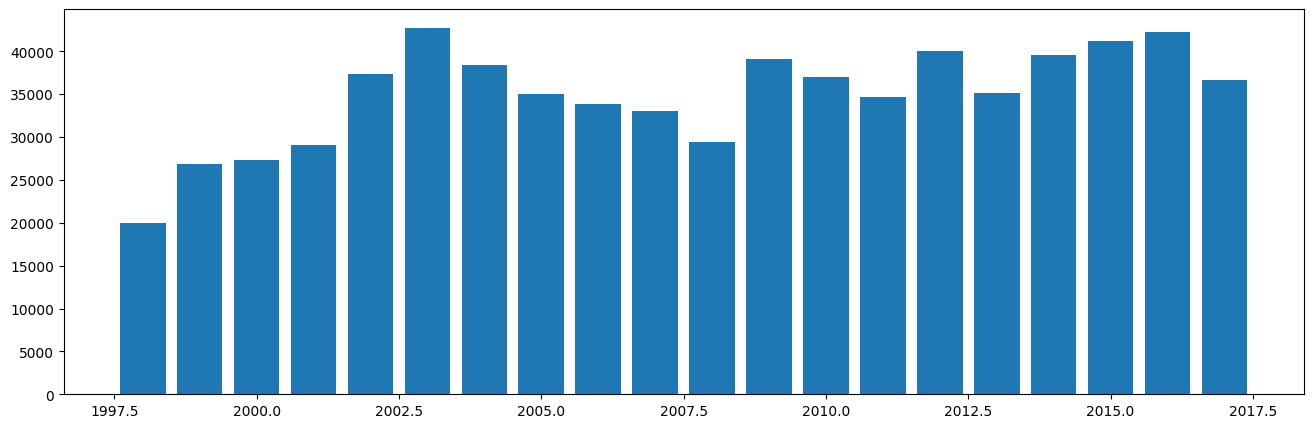

In [28]:
plt.figure(figsize=[16,5])
plt.bar(df2['year'],df2['number'])
plt.show()

# 12. In Which State Maximum Number of Forest Fires Was Reported?

In [29]:
df3=df.groupby("state").agg({'number':'sum'}).reset_index()
print(df3)

               state     number
0               Acre  18464.030
1            Alagoas   4606.000
2              Amapa  21831.576
3           Amazonas  30650.129
4              Bahia  44746.226
5              Ceara  30428.063
6   Distrito Federal   3561.000
7     Espirito Santo   6546.000
8              Goias  37695.520
9           Maranhao  25129.131
10       Mato Grosso  96246.028
11      Minas Gerais  37475.258
12           Paraiba  52426.918
13              Pará  24512.144
14        Pernambuco  24498.000
15              Piau  37803.747
16               Rio  45094.865
17          Rondonia  20285.429
18           Roraima  24385.074
19    Santa Catarina  24359.852
20         Sao Paulo  51121.198
21           Sergipe   3237.000
22         Tocantins  33707.885


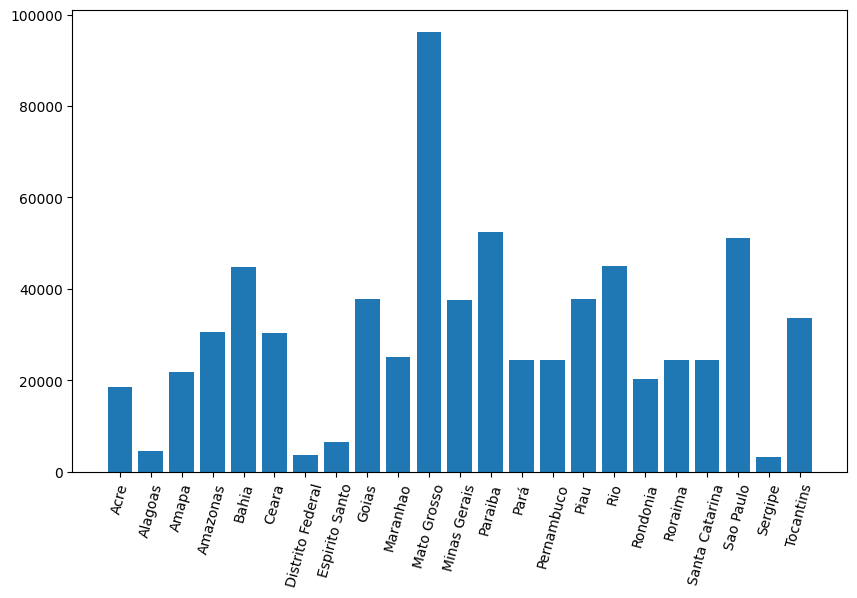

In [30]:
plt.figure(figsize=[10,6])
plt.bar(df3['state'],df3['number'])
plt.xticks(rotation=75)
plt.show()

# 13. Find Total Number of Fires Were Reported In Amazonas

In [31]:
df[df['state']=='Amazonas']['number'].sum()

30650.129

# 14. Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [32]:
df4=df[df['state']=='Amazonas'].groupby('year').agg({'number':'sum'}).reset_index()
df4

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


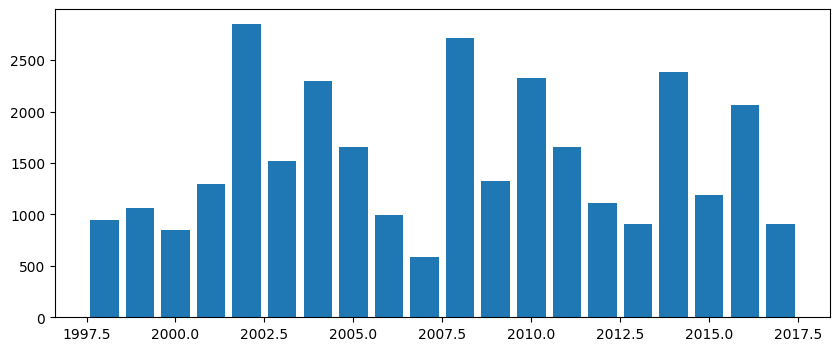

In [33]:
plt.figure(figsize=[10,4])
plt.bar(df4['year'],df4['number'])
plt.show()

# 15. Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [34]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [35]:
df.head(3)

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan


In [36]:
df5=df[df['state']=='Amazonas'].groupby(df['date'].dt.dayofweek).agg({'number':'sum'})
import calendar
df5.index=[calendar.day_name[x] for x in range(0,7)]
df6=df5.reset_index()
df6

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


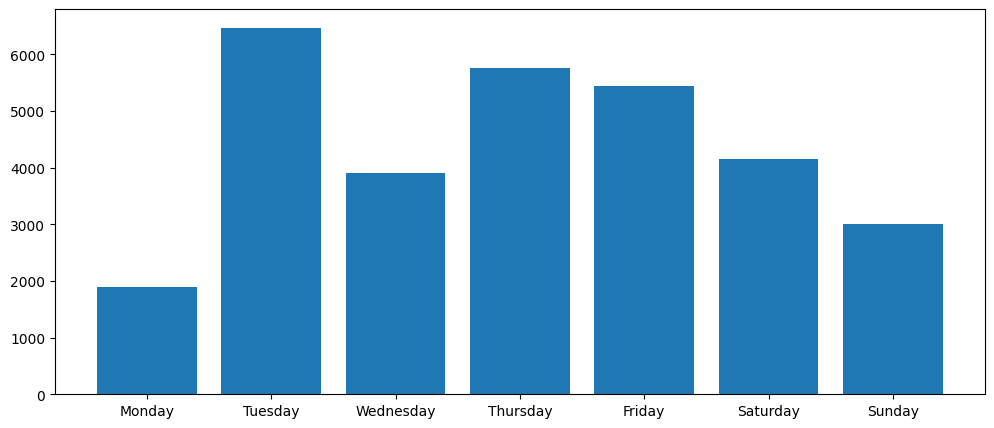

In [37]:
plt.figure(figsize=[12,5])
plt.bar(df6['index'],df6['number'])
plt.show()

# 16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [38]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [39]:
data=df[df['year']==2015]
data

,year,state,month,number,date,month_new
17,2015,Acre,Janeiro,1.000,2015-01-01,jan
37,2015,Acre,Fevereiro,2.000,2015-01-01,feb
57,2015,Acre,Março,2.000,2015-01-01,mar
77,2015,Acre,Abril,3.000,2015-01-01,apr
97,2015,Acre,Maio,2.000,2015-01-01,may
...,...,...,...,...,...,...
6372,2015,Tocantins,Agosto,2.540,2015-01-01,aug
6392,2015,Tocantins,Setembro,5.510,2015-01-01,sep
6412,2015,Tocantins,Outubro,4.844,2015-01-01,oct
6432,2015,Tocantins,Novembro,833.000,2015-01-01,nov


In [40]:
df7=data.groupby('month_new').agg({'number':'sum'}).reset_index()
df7

,month_new,number
0,apr,2573.000
1,aug,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,june,3260.552
7,mar,2202.000
8,may,2384.000
9,nov,4034.518


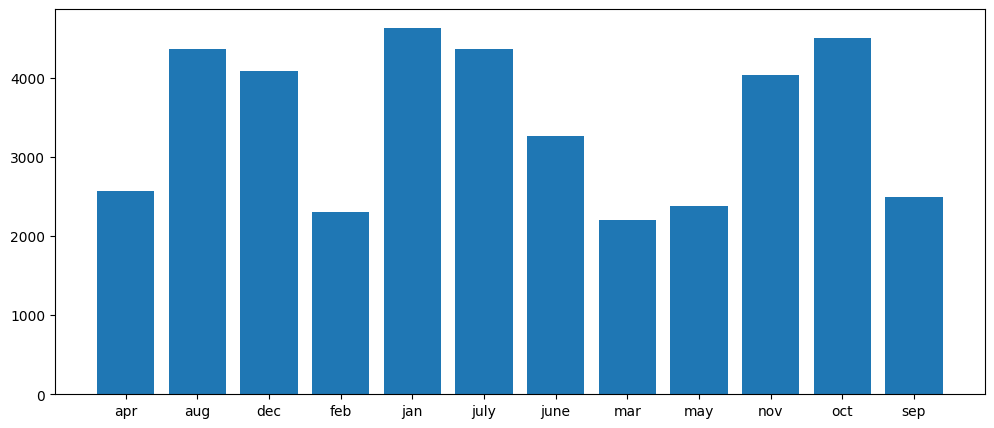

In [41]:
plt.figure(figsize=[12,5])
plt.bar(df7['month_new'],df7['number'])
plt.show()

# 17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [42]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [43]:
df9=df.groupby('state').agg({'number':'mean'}).reset_index()
df9.sort_values('number',ascending=False)

,state,number
20,Sao Paulo,213.896226
10,Mato Grosso,203.479975
4,Bahia,187.222703
15,Piau,158.174674
8,Goias,157.721841
11,Minas Gerais,156.800243
22,Tocantins,141.037176
3,Amazonas,128.243218
5,Ceara,127.314071
12,Paraiba,111.073979


# 18.  To Find The State Names Where Fires Were Reported In 'dec' Month

In [44]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [45]:
df[df['month_new']=='dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)